In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
tf.keras.backend.clear_session()  # For easy reset of notebook state.
from tensorflow.keras.layers import concatenate

In [2]:
tf.__version__

'2.2.0'

# Tensorflow Exercise: Keras Sequential vs. Functional APIs

#### In this exercise, we will practice using the two APIs that Keras provides for building deep learning models: the Keras Sequential and Functional APIs.

##### If you need to reference the syntax of either model, see the Keras documentation pages on the [Sequential](https://keras.io/getting-started/sequential-model-guide/) and [Functional](https://keras.io/getting-started/functional-api-guide/) APIs.

# Part 1: Sequential Voting

#### For our toy problem, we will use the following data:

In [3]:
X = np.random.randint(0, 2, size = (1000, 9))
Y = np.where(np.mean(X, axis = 1) > 0.5, 1, 0)

In [4]:
X.shape,Y.shape

((1000, 9), (1000,))

# Questions:
### 1. What does it mean that the elements of Y represent a "majority vote" on X?


Y[i] = 1 <=> mean(X[row i]) > 0.5 <=> more than half are 1 <=> this is majority vote for 1

Y[i] = 0 <=> mean(X[row i]) <= 0.5 <=> more than half are 0 <=> this is majority vote for 0

### 2. We want to learn how to predict elements of Y from rows of X.<br> Build a Keras Sequential model *model* with one Dense layer (with activation = 'sigmoid') that can be fit on X and Y.

In [5]:
model = Sequential([
        Dense(1, input_dim = X.shape[1], activation="sigmoid", name="layer1")
    ])

### <br> Check that the input and output shapes of the model (*model.input_shape* and *model.output_shape*) match the shapes of X and Y.


In [6]:
model.input_shape, model.output_shape

((None, 9), (None, 1))

The shapes of X and y are match
model.input_shape and model.output_shape

### 3. Compile the model with 'mean_squared_error' loss, 'rmsprop' optimizer, and *metrics = 'accuracy'*, and fit it to X and Y with *validation_split = 0.2*. You may choose any values for *epochs* and *batch_size* that result in the model learning well.


In [7]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(X,Y, epochs=128, batch_size=32,validation_split = 0.2);

Epoch 1/128
25/25 [==============================] - 0s 10ms/step - loss: 0.3794 - accuracy: 0.4412 - val_loss: 0.3687 - val_accuracy: 0.4150
Epoch 2/128
25/25 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.4300 - val_loss: 0.3552 - val_accuracy: 0.4250
Epoch 3/128
25/25 [==============================] - 0s 5ms/step - loss: 0.3562 - accuracy: 0.4175 - val_loss: 0.3412 - val_accuracy: 0.4200
Epoch 4/128
25/25 [==============================] - 0s 5ms/step - loss: 0.3450 - accuracy: 0.4100 - val_loss: 0.3280 - val_accuracy: 0.4150
Epoch 5/128
25/25 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.4050 - val_loss: 0.3155 - val_accuracy: 0.4250
Epoch 6/128
25/25 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.4200 - val_loss: 0.3040 - val_accuracy: 0.4200
Epoch 7/128
25/25 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.4300 - val_loss: 0.2929 - val_accuracy: 0.4450
Epoch 8/128


Epoch 59/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.7163 - val_loss: 0.1901 - val_accuracy: 0.7650
Epoch 60/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.7200 - val_loss: 0.1893 - val_accuracy: 0.7600
Epoch 61/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.7237 - val_loss: 0.1884 - val_accuracy: 0.7600
Epoch 62/128
25/25 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.7262 - val_loss: 0.1876 - val_accuracy: 0.7600
Epoch 63/128
25/25 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.7237 - val_loss: 0.1867 - val_accuracy: 0.7600
Epoch 64/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1891 - accuracy: 0.7275 - val_loss: 0.1859 - val_accuracy: 0.7550
Epoch 65/128
25/25 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.7262 - val_loss: 0.1851 - val_accuracy: 0.7550
Epoch 

### 4. Once the model has been fit, examine the values of *model.get_weights()*. How do you interpret these values?

In [8]:
model.get_weights()

[array([[0.6624822 ],
        [0.38728037],
        [0.49503887],
        [0.42923546],
        [0.52949774],
        [0.56014204],
        [0.41424698],
        [0.54403144],
        [0.43550423]], dtype=float32),
 array([-1.9831312], dtype=float32)]

The first 9 dimensional array is  all the weights of the layer and  last 1 dimensional array is it bias 

# Part 2: Making it Functional

**Now we will practice using Keras's Functional API by rewriting the above model.**

## Questions:

### 5. Create a model model2 identical to the above model, but using the Keras Functional API. The model should include an Input(shape=...) layer from keras.layers and should use Model(inputs = ..., outputs = ...) from keras.models.

In [9]:
inputs = Input(shape=(X.shape[1],))
dense = Dense(1, activation='sigmoid', name="layer1")
outputs = dense(inputs)

model2 = Model(inputs=inputs, outputs=outputs, name='functional')
model2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

 ### Fit this model, verify that it produces the same results, and compare the outputs of .summary() and .get_weights() on model and model2

In [10]:
model2.fit(X,Y, epochs=128, batch_size=32,validation_split = 0.2);


Epoch 1/128
25/25 [==============================] - 0s 9ms/step - loss: 0.3408 - accuracy: 0.3988 - val_loss: 0.3270 - val_accuracy: 0.3950
Epoch 2/128
25/25 [==============================] - 0s 5ms/step - loss: 0.3284 - accuracy: 0.4062 - val_loss: 0.3132 - val_accuracy: 0.4300
Epoch 3/128
25/25 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.4038 - val_loss: 0.3017 - val_accuracy: 0.4300
Epoch 4/128
25/25 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 0.4050 - val_loss: 0.2904 - val_accuracy: 0.4500
Epoch 5/128
25/25 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.4137 - val_loss: 0.2804 - val_accuracy: 0.4650
Epoch 6/128
25/25 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.4225 - val_loss: 0.2713 - val_accuracy: 0.4600
Epoch 7/128
25/25 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.4250 - val_loss: 0.2632 - val_accuracy: 0.5100
Epoch 8/128
2

Epoch 59/128
25/25 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.7462 - val_loss: 0.1845 - val_accuracy: 0.7350
Epoch 60/128
25/25 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.7500 - val_loss: 0.1837 - val_accuracy: 0.7300
Epoch 61/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1859 - accuracy: 0.7500 - val_loss: 0.1829 - val_accuracy: 0.7300
Epoch 62/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.7600 - val_loss: 0.1821 - val_accuracy: 0.7250
Epoch 63/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1838 - accuracy: 0.7613 - val_loss: 0.1813 - val_accuracy: 0.7250
Epoch 64/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.7638 - val_loss: 0.1805 - val_accuracy: 0.7200
Epoch 65/128
25/25 [==============================] - 0s 4ms/step - loss: 0.1816 - accuracy: 0.7600 - val_loss: 0.1797 - val_accuracy: 0.7300
Epoch 

In [11]:
model.get_weights()

[array([[0.6624822 ],
        [0.38728037],
        [0.49503887],
        [0.42923546],
        [0.52949774],
        [0.56014204],
        [0.41424698],
        [0.54403144],
        [0.43550423]], dtype=float32),
 array([-1.9831312], dtype=float32)]

In [12]:
model2.get_weights()

[array([[0.66491324],
        [0.42612   ],
        [0.52305704],
        [0.43424928],
        [0.5532628 ],
        [0.59240544],
        [0.4118178 ],
        [0.5846854 ],
        [0.4494379 ]], dtype=float32),
 array([-2.0774608], dtype=float32)]

In [13]:
model.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [14]:
 model2.summary();

Model: "functional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


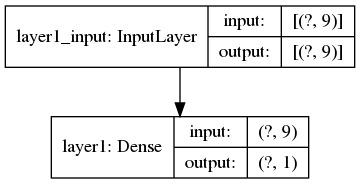

In [15]:
tf.keras.utils.plot_model(model,show_shapes=True)

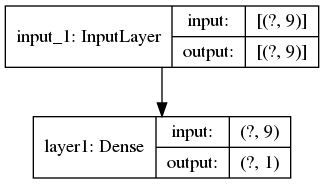

In [16]:
tf.keras.utils.plot_model(model2,show_shapes=True)

We got 2 models with the same shapes of input and output layers and almost the same weights + bias

## Part 3: Identifying identical distributions

#### The previous problem had a nice solution using the Keras Sequential API, but sometimes we will need the Functional API to build more complicated networks. Let's try to learn a slightly more complicated pattern that will be solved more naturally with the Functional API.

#### Let's generate another dataset:

In [17]:
M1 = np.array([np.random.choice([-1, 1]) for i in range(10000)])
M2 = np.array([np.random.choice([-1, 1]) for i in range(10000)])
S1 = np.stack([
    np.random.normal(m, 1, size = 5)
    for m in M1
])
S2 = np.stack([
    np.random.normal(m, 1, size = 5)
    for m in M2
])
labels = np.where(M1 == M2, 1, 0)

#### Every row of S1 and S2 is a sample of 5 elements from a distribution with mean either -1 or 1, and the labels in *label* represent whether the given samples are drawn from the same distribution (0: different distributions, 1: same distribution).

#### We want to train a model to learn how to predict if the two given samples of 5 data points are drawn from the same distribution, i.e. whether they have the same mean.

## Questions:
### 6. Create a Functional model using the following architecture:
  #### * Two Input layers *inp1* and *inp2*, each taking input of dimension 5


In [18]:
input1 = Input(shape=(5,))
input2 = Input(shape=(5,))


  #### * A Dense layer *shared_dense* with output dimension 1 and tanh activation function, shared between the input layers. (Define the Dense layer as *shared_dense = Dense(...)* and then set *x1 = shared_dense(inp1)* and *x2 = shared_dense(inp2)*). This means that the same weights will be applied to both inputs.


In [19]:
shared_dense = Dense(1, activation='tanh', name="layer1")
x1 = shared_dense(input1)
x2 = shared_dense(input2)

  #### * Concatenate the outputs of the dense layers together with *merged = concatenate([x1, x2])*
 

In [20]:
merged = concatenate([x1, x2])

 #### * A Dense layer with output dimension 2 and tanh activation function, applied to *merged*
 

In [21]:
dense_layer_1 = Dense(2, activation='tanh')(merged)


#### * A Dense layer with output dimension 1 and sigmoid activation function, applied to the output of the previous dense layer


In [22]:
dense_layer_1 = Dense(1, activation='sigmoid')(dense_layer_1)

  #### * Finally, define the model as *func_model = Model(inputs = ..., outputs = ...)* for the proper inputs and outputs parameters.


In [23]:
func_model = Model(inputs =[input1,input2], outputs = dense_layer_1)

### 7. Examine the input and output shapes of *func_model* and verify that they match *S1*, *S2*, and *labels*.


In [24]:
func_model.input_shape, func_model.output_shape

([(None, 5), (None, 5)], (None, 1))

In [25]:
S1.shape,S2.shape,labels.shape

((10000, 5), (10000, 5), (10000,))

The shape is 5 and 1 :

    func_model.input_shape, func_model.output_shape are match S1, S2, and labels shapes

### 8. Compile *func_model* with optimiser *sgd*, *binary_crossentropy* loss, and *metrics = 'accuracy'* and fit to *[S1, S2]* and *labels* with *validation_split = 0.2*. <br>Hint: you can use *epochs = 10* and *batch_size = 4* if you are unsure of good values for these hyperparameters. 


In [26]:
func_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### What is the final accuracy that this model achieves? <br>Note: You may have to re-run your code multiple times for the model to learn well, due to randomness. You should get accuracy above 0.95.

In [27]:
func_model.fit([S1, S2],labels, epochs=10, batch_size=4,validation_split = 0.2);

Epoch 1/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6612 - accuracy: 0.6231 - val_loss: 0.5466 - val_accuracy: 0.9050
Epoch 2/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.3469 - accuracy: 0.9639 - val_loss: 0.2205 - val_accuracy: 0.9740
Epoch 3/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1715 - accuracy: 0.9760 - val_loss: 0.1446 - val_accuracy: 0.9725
Epoch 4/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1253 - accuracy: 0.9766 - val_loss: 0.1190 - val_accuracy: 0.9725
Epoch 5/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9762 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0989 - accuracy: 0.9765 - val_loss: 0.1027 - val_accuracy: 0.9725
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0935 - accuracy: 0.9761 - val_loss: 0.0968 - val_accuracy:


## Bonus: 
### Can you interpret the weights in *func_model.get_weights()*?

In [28]:
for lay in func_model.layers:
    print(lay.name)
    print(lay.get_weights())

input_2
[]
input_3
[]
layer1
[array([[-0.5499558 ],
       [-0.5892616 ],
       [-0.5720403 ],
       [-0.42556792],
       [-0.63986105]], dtype=float32), array([0.003162], dtype=float32)]
concatenate
[]
dense
[array([[ 1.905821 ,  1.9243927],
       [-1.9703459, -1.9388585]], dtype=float32), array([-1.6765386,  1.77498  ], dtype=float32)]
dense_1
[array([[-4.0052314],
       [ 4.0191236]], dtype=float32), array([-3.6294186], dtype=float32)]


From the input values to the first hidden layer "transition", the weights are stored in the first hidden layer. And so on until the output layer that stores the weights of the "transition" from the last hidden layer to the output layer